**Task1:**
Building a Digit Classifier with Scikit-Learn and Decision Trees

In [27]:
from sklearn.datasets import load_digits # loading the digits dataset
mnist = load_digits()


In [28]:
mnist.images.shape

(1797, 8, 8)

In [29]:
mnist.images[0] # Displaying the first image in the dataset

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [30]:
from sklearn.model_selection import train_test_split # Spliting the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(mnist.data, mnist.target)

In [31]:
from sklearn.tree import DecisionTreeClassifier # Creating and Training a Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(trainX, trainY)

DecisionTreeClassifier()

In [32]:
predY = dt.predict(testX) # getting prediction

In [33]:
dt.score(testX, testY)

0.8333333333333334

In [36]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix1 = confusion_matrix(testY, predY)

In [37]:
conf_matrix1

array([[46,  0,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0, 37,  2,  1,  2,  1,  0,  0,  3,  2],
       [ 0,  2, 45,  1,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  1,  5,  1],
       [ 1,  3,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 33,  1,  0,  0,  4],
       [ 0,  1,  0,  0,  1,  0, 46,  0,  1,  0],
       [ 0,  0,  1,  1,  4,  4,  0, 32,  0,  0],
       [ 0,  0,  1,  2,  2,  0,  0,  1, 30,  3],
       [ 1,  4,  1,  0,  1,  1,  0,  1,  3, 34]], dtype=int64)

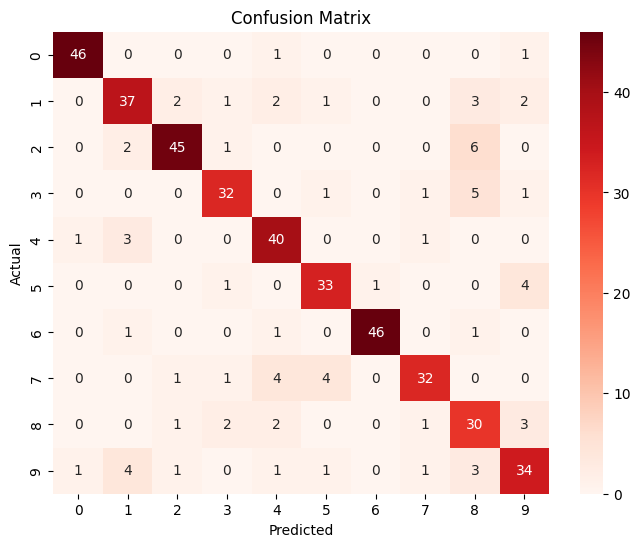

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Reds", 
xticklabels=mnist.target_names, yticklabels=mnist.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Interpretation: Most of the numbers have been correctly identified. But there are some points to be noted i-e
                1. The actual value was 4 but it was identified as 1 four times.
                2. Similarly, Actual value was 9 but it was identified as 5 four times.
                3. There are a few other such cases.

In [39]:
# Classification report
from sklearn.metrics import classification_report
report = classification_report(testY, predY)
print("Classification Report : \n", report)

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.79      0.77      0.78        48
           2       0.90      0.83      0.87        54
           3       0.84      0.80      0.82        40
           4       0.78      0.89      0.83        45
           5       0.82      0.85      0.84        39
           6       0.98      0.94      0.96        49
           7       0.89      0.76      0.82        42
           8       0.62      0.77      0.69        39
           9       0.76      0.74      0.75        46

    accuracy                           0.83       450
   macro avg       0.83      0.83      0.83       450
weighted avg       0.84      0.83      0.83       450



**Task2:**
Building a Decision Tree Classifier using Random Forest Algorithm

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the digits dataset
mnist = load_digits()

# Split the data into training and testing sets


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(trainX, trainY)

# Make predictions
predictions = rf_classifier.predict(testX)


In [41]:
report2 = classification_report(testY, predictions)
print("Classification Report : \n", report2)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.96      1.00      0.98        48
           2       0.98      0.98      0.98        54
           3       1.00      0.90      0.95        40
           4       1.00      0.98      0.99        45
           5       0.97      0.95      0.96        39
           6       0.98      0.98      0.98        49
           7       0.89      0.98      0.93        42
           8       0.95      0.92      0.94        39
           9       0.94      0.96      0.95        46

    accuracy                           0.97       450
   macro avg       0.97      0.96      0.97       450
weighted avg       0.97      0.97      0.97       450



In [42]:
conf_matrix2 = confusion_matrix(testY, predictions)
conf_matrix2

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  2,  1,  1],
       [ 0,  0,  0,  0, 44,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  1, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 44]], dtype=int64)

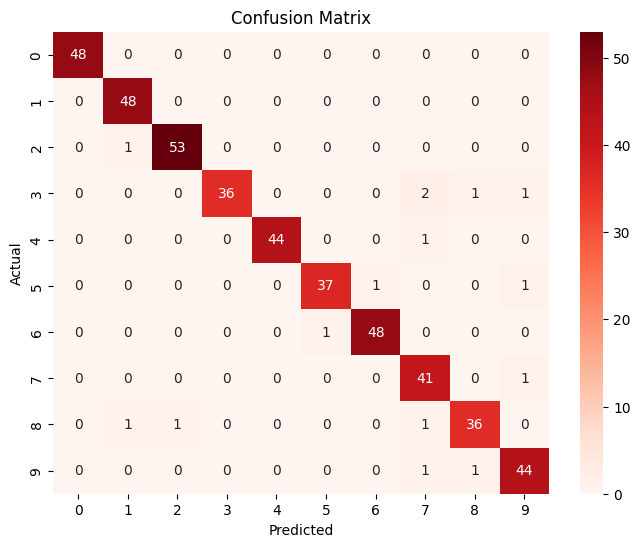

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Reds", 
xticklabels=mnist.target_names, yticklabels=mnist.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Task3:**
Building an Ensemble Voting Classifier for Digits Classification

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# Load the digits dataset
# mnist = load_digits()

# Split the data into training and testing sets
# trainX, testX, trainY, testY = train_test_split(mnist.data, mnist.target, random_state=42)

# Create individual classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)  # Use probability=True for soft voting
sgd_classifier = SGDClassifier(loss='modified_huber', random_state=42)  # Using 'log' loss for SGDClassifier

# Create a voting classifier with a soft voting strategy
voting_classifier = VotingClassifier(
    estimators=[('decision_tree', dt_classifier), ('svm', svm_classifier), ('sgd', sgd_classifier)],
    voting='soft'
)

# Train the voting classifier
voting_classifier.fit(trainX, trainY)

# Make predictions
predictions = voting_classifier.predict(testX)

# Evaluate the performance
accuracy = accuracy_score(testY, predictions)
print("Voting Classifier Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(testY, predictions))


Voting Classifier Accuracy: 0.9466666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.88      0.94      0.91        48
           2       0.98      0.98      0.98        54
           3       0.97      0.90      0.94        40
           4       0.95      0.93      0.94        45
           5       0.95      0.95      0.95        39
           6       0.94      0.98      0.96        49
           7       0.95      0.93      0.94        42
           8       0.92      0.85      0.88        39
           9       0.94      0.98      0.96        46

    accuracy                           0.95       450
   macro avg       0.95      0.94      0.94       450
weighted avg       0.95      0.95      0.95       450

